In [1]:
import ROOT
import numpy as np
import pandas as pd

Welcome to JupyROOT 6.26/02


In [14]:
ntuple=ROOT.RDataFrame("ntuple","./build/muonID5000.root")
#ROOT.TNtuple.Draw("xPixel:yPixel","","colz")
numPix=100
partDict={"mu+":0,"gamma":1,"e-":2,"e+":3,"unknown":-1}

In [3]:

histXPix=ntuple.Histo1D(("hist","hist",numPix,-0.25,0.25),"XPixel")
histXPix.SetTitle("XPixel")
histXPix.SetXTitle("Position [m]")
histXPix.SetYTitle("Counts")
histYPix=ntuple.Histo1D(("hist","hist",numPix,-0.25,0.25),"YPixel")
histYPix.SetTitle("YPixel")
histYPix.SetXTitle("Position [m]")
histYPix.SetYTitle("Counts")

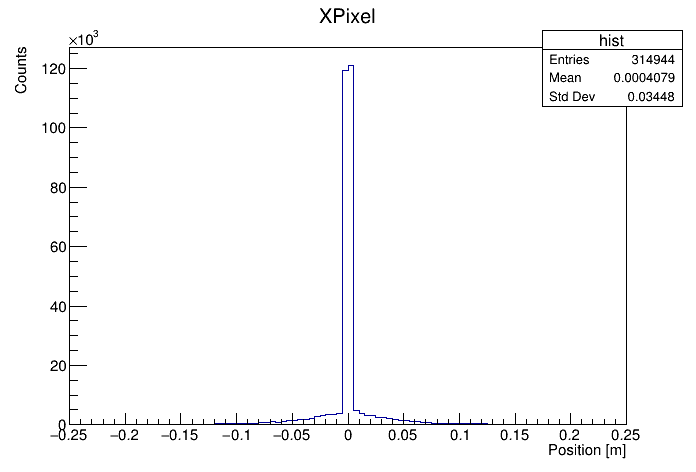

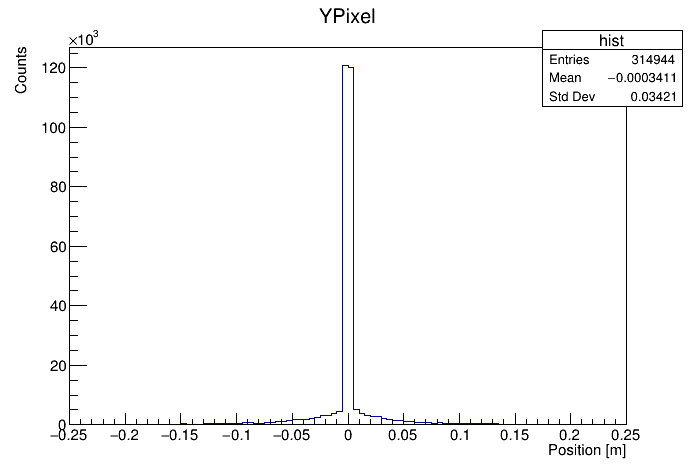

In [4]:
c=ROOT.TCanvas()
histXPix.Draw()
c.Draw()
c2=ROOT.TCanvas()
histYPix.Draw()
c2.Draw()

#Vedi come salvare in file root info sul detector

In [43]:
particle="e-"
part_df=ntuple.Filter(f"ParticleID=={partDict[particle]}")

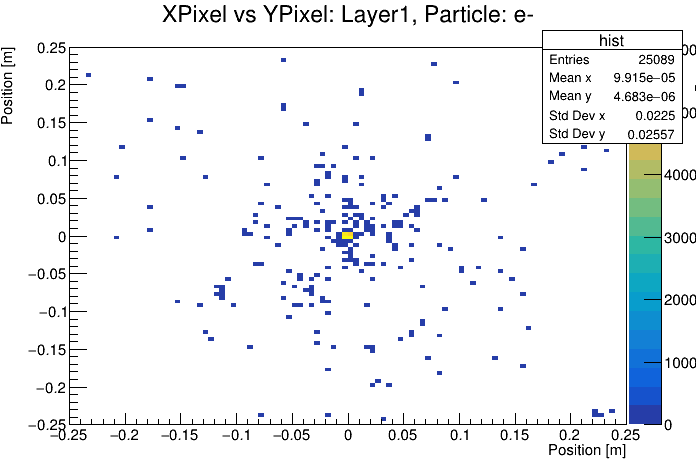

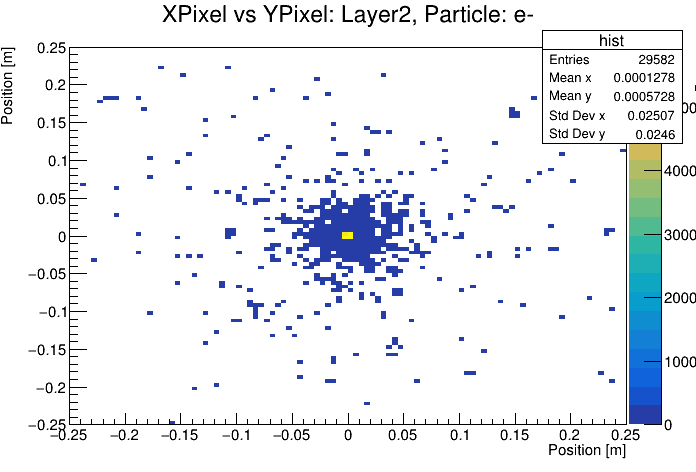

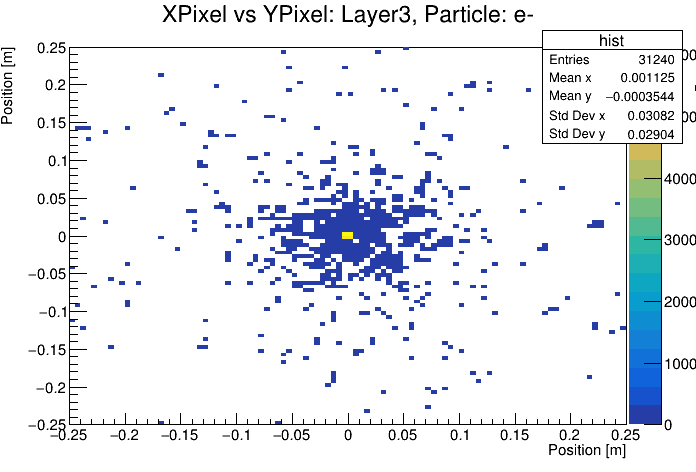

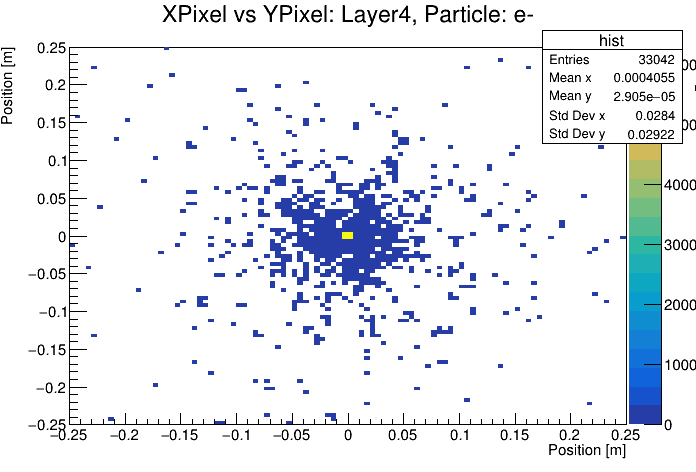

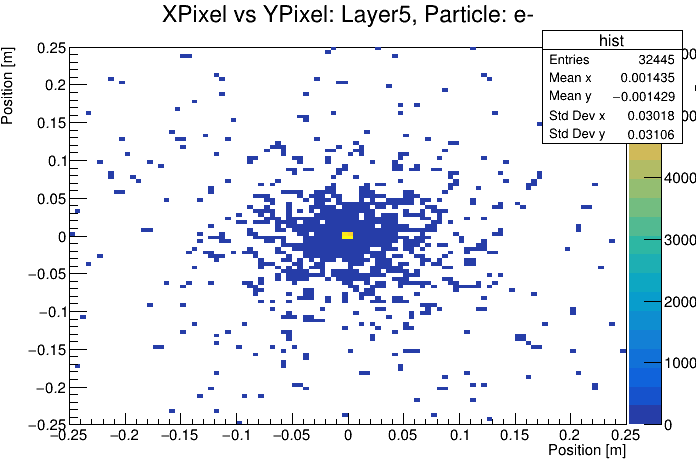

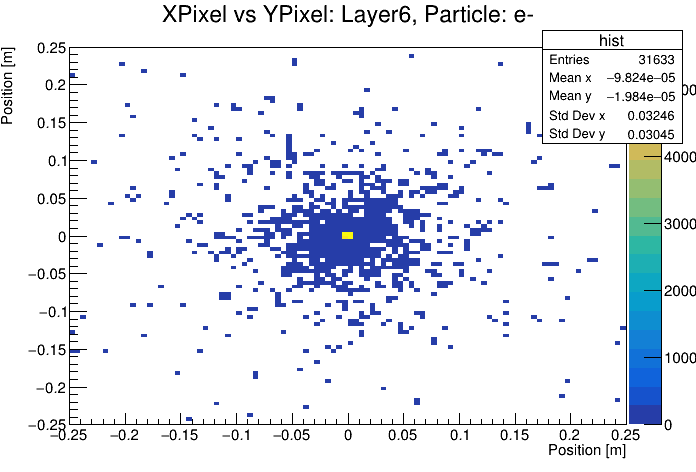

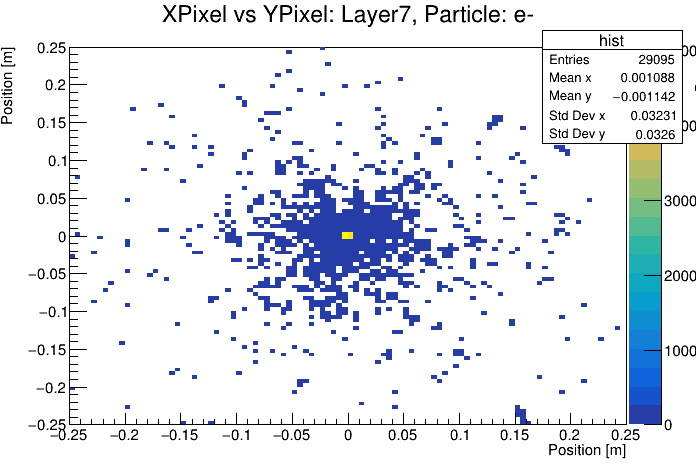

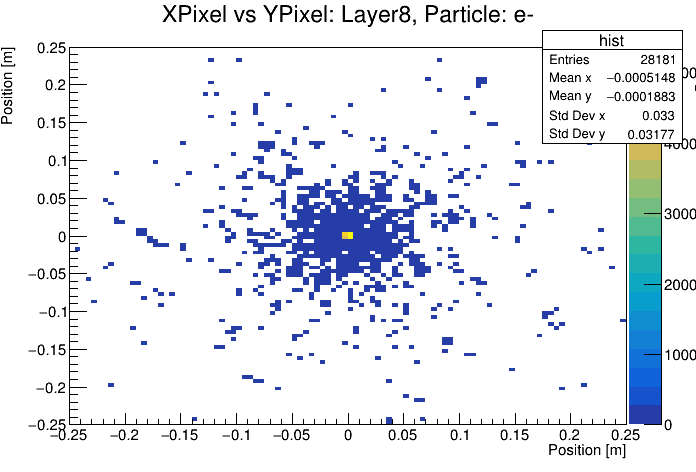

In [44]:
for i in range(8):
    exec(f"hist2D{i}=part_df.Filter(f\"Layer=={i+1}\").Histo2D((\"hist\",\"hist\",numPix,-0.25,0.25,numPix,-0.25,0.25),\"XPixel\",\"YPixel\")")
    exec(f"hist2D{i}.SetTitle(\"XPixel vs YPixel: Layer{i+1}, Particle: {particle}\")")
    exec(f"hist2D{i}.SetXTitle(\"Position [m]\")")
    exec(f"hist2D{i}.SetYTitle(\"Position [m]\")")
    exec(f"hist2D{i}.SetZTitle(\"Counts\")")
    exec(f"c{i+2}=ROOT.TCanvas()")
    exec(f"hist2D{i}.Draw(\"colz\")")
    exec(f"c{i+2}.Draw()")



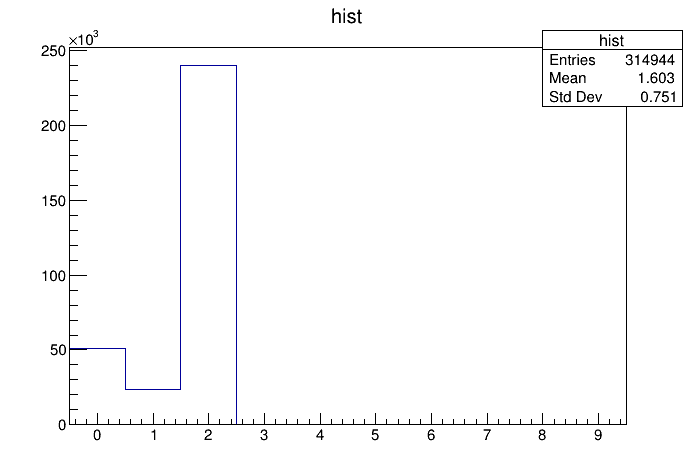

In [7]:
c=ROOT.TCanvas()
hist=ntuple.Histo1D(("hist","hist",10,-0.5,9.5),"ParticleID")
hist.Draw()
c.Draw()

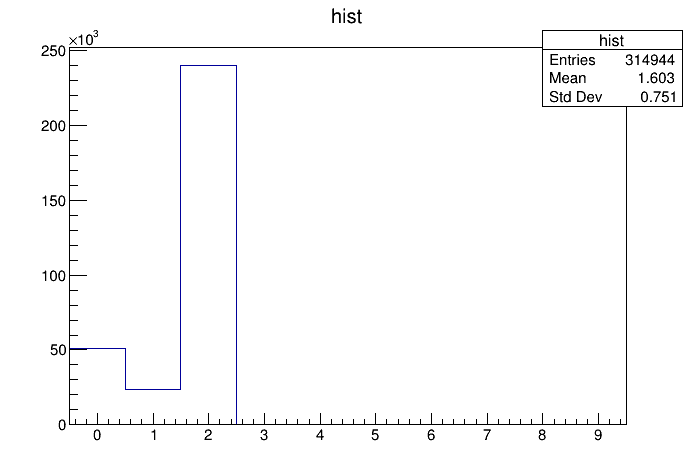

In [8]:
c=ROOT.TCanvas()
hist.Draw()
c.Draw()
